# Load nutrient data

1. make x-array
2. combine good data
3. create plot with one y axis µM and the other pressure
    -> only select pressure for sampling days

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import xarray as xr
import pandas as pd

In [2]:
# for pressure time series
file_name = "data/rteb_all_1D.nc"
ds_eb = xr.open_dataset(file_name)

In [3]:
file_name = '/Users/marie-louisekorte/OneDrive - University of the Highlands and Islands/SAMS Summer Internship/Rockall_Trough_MHW/data/BioGeoChem/20172018_RAS_data_use_original.csv'
pd_N = pd.read_csv(file_name, header = 10)
pd_N = pd_N.drop(labels = 0)

In [4]:
pd_N['time']=''

In [5]:
dt_year = (pd_N.Year) 
dt_month =(pd_N.Month)
dt_day = (pd_N.Day)
#dt_hour = (pd_N.Hour)

In [6]:
dt_all = (dt_year + dt_month + dt_day) # + dt_hour)

In [7]:
format= "%Y%m%d" #%H"

In [8]:
for n in dt_all.index:
    dt_object = datetime.datetime.strptime(dt_all[n], format)
    pd_N.time[n]=dt_object

In [9]:
pd_N

,Sample id,Day,Month,Year,Hour,Min,Nitrite1,Nitrite2,Nitrite+Nitrate1,Nitrite+Nitrate2,...,Phosphate2,Phos1_flag,Phos2_flag,mean DIC,std DIC,DIC_flag,mean TA,std TA,TA_flag,time
1,RAS 1,15,5,2017,6,0,0.1,0.2,8.6,5.3,...,0.69,3,2,2865,3,4,2313,4,2,2017-05-15 00:00:00
2,RAS 2,25,5,2017,6,0,0.2,0.2,9.5,9.2,...,0.85,3,2,2883,7,4,2275,8,4,2017-05-25 00:00:00
3,RAS 3,4,6,2017,6,0,0.0,0.0,9.2,10.3,...,0.88,2,2,2894,10,4,2321,0,2,2017-06-04 00:00:00
4,RAS 4,14,6,2017,6,0,0.1,0.1,3.2,3.2,...,0.60,2,2,2686,2,4,2179,3,4,2017-06-14 00:00:00
5,RAS 5,24,6,2017,6,0,0.0,0.3,10.9,6.9,...,0.77,3,2,2856,6,4,2316,2,2,2017-06-24 00:00:00
6,RAS 6,4,7,2017,6,0,0.2,0.2,6.4,6.5,...,0.66,2,2,2148,7,4,1780,85,4,2017-07-04 00:00:00
7,RAS 7,14,7,2017,6,0,0.2,0.3,6.2,8.2,...,0.84,2,2,2964,6,4,2320,7,2,2017-07-14 00:00:00
8,RAS 8,24,7,2017,6,0,0.3,0.3,7.4,7.5,...,0.76,2,2,2581,5,4,2077,7,4,2017-07-24 00:00:00
9,RAS 9,3,8,2017,6,0,0.0,0.4,10.8,8.0,...,0.84,2,2,2994,6,4,2319,2,2,2017-08-03 00:00:00
10,RAS 10,13,8,2017,6,0,0.2,0.2,4.9,5.2,...,0.61,2,2,2871,3,4,2313,6,2,2017-08-13 00:00:00


In [10]:
ds_N = pd_N.to_xarray()

In [11]:
ds_N.coords['time'] = ds_N.time
ds_N = ds_N.swap_dims({'index':'time'}).drop('index')
ds_N.time.attrs['units'] = 'days since 1950-01-01 00:00:00'

In [12]:
ds_N = ds_N.drop_vars('Sample id')
ds_N = ds_N.astype(float)
ds_N

<xarray.Dataset>
Dimensions:           (time: 42)
Coordinates:
  * time              (time) datetime64[ns] 2017-05-15 2017-05-25 ... 2018-06-29
Data variables: (12/27)
    Day               (time) float64 15.0 25.0 4.0 14.0 ... 30.0 9.0 19.0 29.0
    Month             (time) float64 5.0 5.0 6.0 6.0 6.0 ... 5.0 5.0 6.0 6.0 6.0
    Year              (time) float64 2.017e+03 2.017e+03 ... 2.018e+03 2.018e+03
    Hour              (time) float64 6.0 6.0 6.0 6.0 6.0 ... 6.0 6.0 6.0 6.0 6.0
    Min               (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Nitrite1          (time) float64 0.1 0.2 0.0 0.1 0.0 ... 0.2 0.2 0.3 0.3 0.2
    ...                ...
    mean DIC          (time) float64 2.865e+03 2.883e+03 ... 2.582e+03 1.945e+03
    std DIC           (time) float64 3.0 7.0 10.0 2.0 6.0 ... 4.0 6.0 14.0 273.0
    DIC_flag          (time) float64 4.0 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0 4.0
    mean TA           (time) float64 2.313e+03 2.275e+03 ... 2.322e+03 1.3e+03
    std TA            (time) float64 4.0 8.0 0.0 3.0 2.0 ... 1.0 13.0 10.0 nan
    TA_flag           (time) float64 2.0 4.0 2.0 4.0 2.0 ... 2.0 2.0 4.0 2.0 4.0

In [13]:
def combine_good(ds_1, ds_2, flag_1, flag_2):
    N1 = ds_1.where(flag_1==2)
    N2 = ds_2.where(flag_2==2)
    N = xr.concat([N1, N2], dim = 'sample')
    N = N.mean('sample', keep_attrs=True)
    
    return N

In [14]:
N = combine_good(ds_N['Nitrite+Nitrate1'], ds_N['Nitrite+Nitrate2'], ds_N.Nit1_flag, ds_N.Nit2_flag)
S = combine_good(ds_N['Silicate1'], ds_N['Silicate2'], ds_N.Silc1_flag, ds_N.Silc2_flag)
P = combine_good(ds_N['Phosphate1'], ds_N['Phosphate2'], ds_N.Phos1_flag, ds_N.Phos2_flag)

ds_Nutr = xr.merge([N,S,P])

In [15]:
ds_Nutr = ds_Nutr.rename_vars({'Nitrite+Nitrate1':'NitriteNitrate',
                               'Silicate1':'Silicate', 
                               'Phosphate1':'Phosphate'})

In [18]:
ds_Nutr['pres'] = ds_eb.pres.sel(depth=50).where(ds_Nutr.time.notnull())

In [20]:
ds_Nutr

<xarray.Dataset>
Dimensions:         (time: 42)
Coordinates:
  * time            (time) datetime64[ns] 2017-05-15 2017-05-25 ... 2018-06-29
    depth           float64 50.0
Data variables:
    NitriteNitrate  (time) float64 5.3 nan nan nan 6.9 ... 7.9 8.15 8.65 6.85
    Silicate        (time) float64 1.0 nan nan 0.75 1.4 ... 1.45 1.5 1.55 0.95
    Phosphate       (time) float64 0.69 0.85 0.775 0.585 ... 0.875 0.92 0.72
    pres            (time) float64 61.26 56.13 56.91 56.7 ... 55.62 55.3 54.99

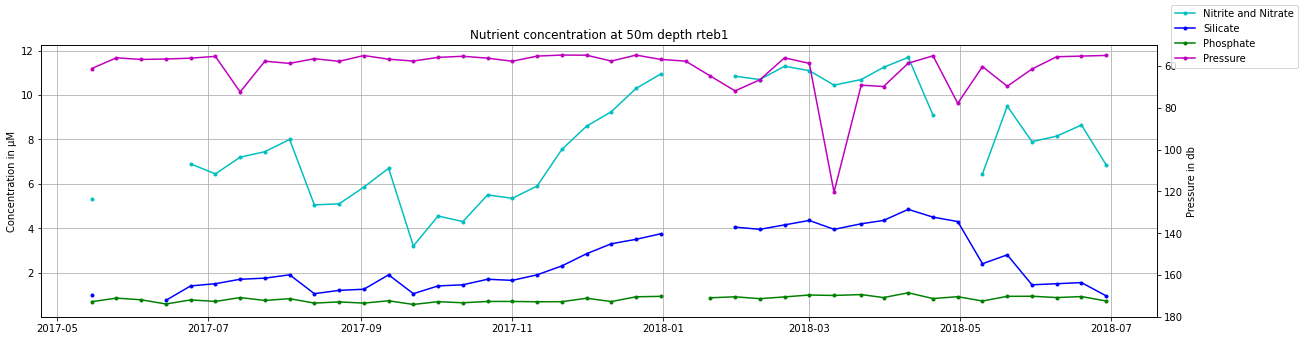

In [95]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax2 = ax.twinx()
ax.plot(ds_Nutr.time, ds_Nutr.NitriteNitrate, 'c.-', label = 'Nitrite and Nitrate')
ax.plot(ds_Nutr.time, ds_Nutr.Silicate, 'b.-', label = 'Silicate')
ax.plot(ds_Nutr.time, ds_Nutr.Phosphate, 'g.-', label = 'Phosphate') 
ax.grid()
ax.set_ylabel('Concentration in µM');
ax.set_xlabel('');
ax.set_title('Nutrient concentration at 50m depth rteb1');

ax2.plot(ds_Nutr.time, ds_Nutr.pres, 'm.-', label = 'Pressure');
ax2.set_ylim(180,50)
ax2.set_ylabel('Pressure in db');

fig.legend();
#fig.tight_layout()

fig.savefig('figures/Nutrients_and_Pressure', dpi = 300)
